<a href="https://colab.research.google.com/github/NitishPal2013/ML-For-Beginners/blob/main/Hotel_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import matplotlib.pyplot as plt


In [7]:
import pandas as pd

df = pd.read_csv('/content/Hotel_Reviews.csv')
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


# Our Aim :
* Most frequent words and phrases in reviews
* Tags and review realtion
* Does the NLTK sentiment matches with hotel scores ?

## Classification of Dataset Columns :-

1) **Hotel Columns** : These columns provides information of about the hotel.

```
Hotel_Name
Hotel_Address
lat
lng
```

2) **Meta Data** : These columns provides meta information about the hotels data.

```
Average_Score
Total_Number_of_Reviews
Additional_Number_of_Scoring
```

3) **Review Columns** : These provides the review data about the hotels .
```
Reviewer_Score
Negative_Review
Review_Total_Negative_Word_Counts
Positive_Review
Review_Total_Positive_Word_Counts
Review_Date
days_since_review
Tags
```

4) **Reviewer Columns** : These column provides the Reviewer Details .
```
Total_Number_of_Reviews_Reviewer_Has_Given
Reviewer_Nationality

```

In [8]:
df.shape

(515738, 17)

Numbers realted to Revierwers Nationality

In [13]:
# How many distict values are there for the column Reviewer_Nationality and what are they?
arr = df['Reviewer_Nationality'].unique()
print("Number of distinct Reviewer Nationalities = " + str(arr.shape[0]))
print("Nationalities :--- \n")
arr

Number of distinct Reviewer Nationalities = 227
Nationalities :--- 



array([' Russia ', ' Ireland ', ' Australia ', ' United Kingdom ',
       ' New Zealand ', ' Poland ', ' Belgium ', ' Norway ', ' France ',
       ' Italy ', ' Canada ', ' Netherlands ', ' Germany ',
       ' United States of America ', ' Hungary ', ' Israel ',
       ' Switzerland ', ' India ', ' United Arab Emirates ', ' Malaysia ',
       ' Denmark ', ' South Africa ', ' Rwanda ', ' Finland ',
       ' Portugal ', ' Luxembourg ', ' Spain ', ' Malta ', ' China ',
       ' Turkey ', ' Ukraine ', ' Gibraltar ', ' Argentina ',
       ' Abkhazia Georgia ', ' Isle of Man ', ' Sweden ', ' Croatia ',
       ' Saudi Arabia ', ' Lithuania ', ' Slovenia ', ' Panama ',
       ' Austria ', ' Brazil ', ' Taiwan ', ' Iceland ', ' Iran ',
       ' Liechtenstein ', ' Chile ', ' Hong Kong ',
       ' United States Minor Outlying Islands ', ' Morocco ', ' Oman ',
       ' Lebanon ', ' Qatar ', ' Nigeria ', ' Romania ',
       ' Czech Republic ', ' Greece ', ' Thailand ', ' Singapore ',
       ' Guerns

In [16]:
# Most commmon nationality in dataset
nationality_counts = df['Reviewer_Nationality'].value_counts()
nationality_counts

 United Kingdom               245246
 United States of America      35437
 Australia                     21686
 Ireland                       14827
 United Arab Emirates          10235
                               ...  
 Cape Verde                        1
 Northern Mariana Islands          1
 Tuvalu                            1
 Guinea                            1
 Palau                             1
Name: Reviewer_Nationality, Length: 227, dtype: int64

<Axes: >

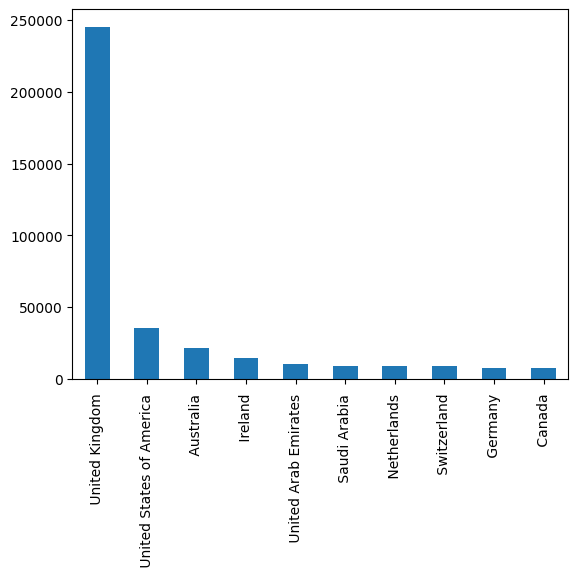

In [22]:
nationality_counts[:10].plot(kind = 'bar')


The above plot shows the highest frequency reviewer nationalities.

In [23]:
Top_nationalities = nationality_counts[:10]

In [49]:
# What was the most frequently reviewed hotel for the top 10 nationalities

In [41]:
filtered_df = df[df['Reviewer_Nationality'].isin(Top_nationalities.index)]
filtered_df

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
6,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/17/2017,7.7,Hotel Arena,United Kingdom,Cleaner did not change our sheet and duvet ev...,33,1403,The room is spacious and bright The hotel is ...,18,6,4.6,"[' Leisure trip ', ' Group ', ' Duplex Twin Ro...",17 days,52.360576,4.915968
7,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/17/2017,7.7,Hotel Arena,United Kingdom,Apart from the price for the brekfast Everyth...,11,1403,Good location Set in a lovely park friendly s...,19,1,10.0,"[' Leisure trip ', ' Couple ', ' Duplex Double...",17 days,52.360576,4.915968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515714,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,4/14/2016,8.1,Atlantis Hotel Vienna,United Kingdom,Staff not always at reception and had to wait...,16,2823,The nice and friendly staff who were always h...,14,1,9.6,"[' Leisure trip ', ' Family with older childre...",476 day,48.203745,16.335677
515715,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,3/30/2016,8.1,Atlantis Hotel Vienna,United Kingdom,would have liked restaurant also serving dinner,8,2823,Close to the metro station n super market,9,1,8.8,"[' Leisure trip ', ' Group ', ' Standard Doubl...",491 day,48.203745,16.335677
515722,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,11/26/2015,8.1,Atlantis Hotel Vienna,United Kingdom,noisy at night air causing loud banging in he...,19,2823,clean,2,72,6.3,"[' Business trip ', ' Solo traveler ', ' Stand...",616 day,48.203745,16.335677
515727,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,9/27/2015,8.1,Atlantis Hotel Vienna,United Kingdom,Wifi Location No tea or coffee in the room,10,2823,Rather cheap and not to far away from the cen...,15,12,5.8,"[' Leisure trip ', ' Couple ', ' Standard Doub...",676 day,48.203745,16.335677


In [44]:
grouped_df = filtered_df.groupby(["Reviewer_Nationality","Hotel_Name"]).size().reset_index(name = "Number_of_Reviews")
grouped_df

,Reviewer_Nationality,Hotel_Name,Number_of_Reviews
0,Australia,11 Cadogan Gardens,5
1,Australia,1K Hotel,11
2,Australia,25hours Hotel beim MuseumsQuartier,25
3,Australia,41,6
4,Australia,88 Studios,20
...,...,...,...
13353,United States of America,citizenM London Bankside,59
13354,United States of America,citizenM London Shoreditch,32
13355,United States of America,citizenM Tower of London,73
13356,United States of America,every hotel Piccadilly,35


In [45]:
sorted_df = grouped_df.sort_values('Number_of_Reviews',ascending = False)
sorted_df.head()

,Reviewer_Nationality,Hotel_Name,Number_of_Reviews
10581,United Kingdom,Britannia International Hotel Canary Wharf,3833
11686,United Kingdom,Strand Palace Hotel,2988
10678,United Kingdom,DoubleTree by Hilton Hotel London Tower of London,2579
11542,United Kingdom,Park Plaza Westminster Bridge London,2537
10637,United Kingdom,Copthorne Tara Hotel London Kensington,2501


In [48]:
for nat in Top_nationalities.index:
  result = sorted_df[sorted_df["Reviewer_Nationality"] == nat].iloc[0]
  print(f'The most reviewed hotel for {result["Reviewer_Nationality"]} was {result["Hotel_Name"]} with {result["Number_of_Reviews"]} .')

The most reviewed hotel for  United Kingdom  was Britannia International Hotel Canary Wharf with 3833 .
The most reviewed hotel for  United States of America  was Hotel Esther a with 423 .
The most reviewed hotel for  Australia  was Park Plaza Westminster Bridge London with 167 .
The most reviewed hotel for  Ireland  was Copthorne Tara Hotel London Kensington with 239 .
The most reviewed hotel for  United Arab Emirates  was Millennium Hotel London Knightsbridge with 129 .
The most reviewed hotel for  Saudi Arabia  was The Cumberland A Guoman Hotel with 142 .
The most reviewed hotel for  Netherlands  was Jaz Amsterdam with 97 .
The most reviewed hotel for  Switzerland  was Hotel Da Vinci with 97 .
The most reviewed hotel for  Germany  was Hotel Da Vinci with 86 .
The most reviewed hotel for  Canada  was St James Court A Taj Hotel London with 61 .
